# Inisialisasi Kaggle API


In [ ]:
! chmod 600 /content/kaggle.json

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 2.9 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=743f7f9a81b949356afbcee357ea9db90fe15f82892ef907da2fabb4438a9030
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d nafianmuh/koi-dataset #kaggle datasets download -d nafianmuh/koi-dataset

 66% 56.0M/84.3M [00:00<00:00, 76.3MB/s]
100% 84.3M/84.3M [00:00<00:00, 105MB/s] 


# Load Dataset

In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
zip_file = zipfile.ZipFile('koi-dataset.zip','r')
zip_file.extractall('/tmp/dataset/')

In [ ]:
print(os.listdir('/tmp/'))
print(os.listdir('/tmp/dataset/Dataset'))

['pyright-97-pZP8roHYAn17', 'pyright-97-GAa7UD06l7BB', 'dataset', 'initgoogle_syslog_dir.0', 'dap_multiplexer.INFO', 'debugger_2rh9lszbxk', 'dap_multiplexer.b393ba734790.root.log.INFO.20220611-060743.43', 'python-languageserver-cancellation']
['Sanke', 'Goshiki', 'Bekko', 'Utsurimono', 'Shusui', 'Kohaku', 'Koromo', 'Showa', 'Asagi', 'Hikarimono']


In [ ]:
#class_names = ['Utsurimono', 'Sanke', 'Showa','Chagoi', 'Shusui','Shiro', 'Asagi', 'Koromo', 'Tancho', 'Kohaku']
class_names = ['Hikarimono', 'Koromo', 'Asagi', 'Utsurimono', 'Sanke', 'Shusui', 'Goshiki', 'Bekko', 'Showa', 'Kohaku']

In [ ]:
source_path = '/tmp/dataset/Dataset/'
source_path_koi = []
for names in class_names: 
  source_path_koi.append(os.path.join(source_path, names))

for labels in source_path_koi:
  print(f"There are {len(os.listdir(labels))} images of {os.path.basename(labels)} koi.")

There are 56 images of Hikarimono koi.
There are 39 images of Koromo koi.
There are 33 images of Asagi koi.
There are 24 images of Utsurimono koi.
There are 65 images of Sanke koi.
There are 44 images of Shusui koi.
There are 85 images of Goshiki koi.
There are 92 images of Bekko koi.
There are 23 images of Showa koi.
There are 35 images of Kohaku koi.


In [ ]:
for labels in source_path_koi:
  print(labels)

/tmp/dataset/Dataset/Hikarimono
/tmp/dataset/Dataset/Koromo
/tmp/dataset/Dataset/Asagi
/tmp/dataset/Dataset/Utsurimono
/tmp/dataset/Dataset/Sanke
/tmp/dataset/Dataset/Shusui
/tmp/dataset/Dataset/Goshiki
/tmp/dataset/Dataset/Bekko
/tmp/dataset/Dataset/Showa
/tmp/dataset/Dataset/Kohaku


# Create train and test directory

In [ ]:
# Define root directory
root_dir = '/tmp/koi'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_test_dirs
def create_train_test_dirs(root_path):
  ### START CODE HERE

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter
  training_dir = 'training'
  testing_dir = 'testing'
  training_path = os.path.join(root_path,training_dir)
  testing_path = os.path.join(root_path, testing_dir)

  for path in source_path_koi:
    os.makedirs(os.path.join(training_path, os.path.basename(path)))

    os.makedirs(os.path.join(testing_path, os.path.basename(path)))

  pass

  ### END CODE HERE

  
try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
# GRADED FUNCTION: split_data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  ### START CODE HERE
  content = random.sample(os.listdir(SOURCE),len(os.listdir(SOURCE)))

  for index, name in enumerate(content):
    if os.path.getsize(os.path.join(SOURCE, name)) == 0:
      print('{} is zero length, so ignoring.'.format(name))
      del content[index]
      
  
  splitsize = int(len(content)) * SPLIT_SIZE
  count = 0 
  
  for x in content:
    if count != int(splitsize):
      copyfile(os.path.join(SOURCE, x), os.path.join(TRAINING,x))
      count += 1
    else:
      copyfile(os.path.join(SOURCE, x), os.path.join(TESTING,x))
  
  ### END CODE HERE


In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/koi/training
/tmp/koi/testing
/tmp/koi/training/Sanke
/tmp/koi/training/Goshiki
/tmp/koi/training/Bekko
/tmp/koi/training/Utsurimono
/tmp/koi/training/Shusui
/tmp/koi/training/Kohaku
/tmp/koi/training/Koromo
/tmp/koi/training/Showa
/tmp/koi/training/Asagi
/tmp/koi/training/Hikarimono
/tmp/koi/testing/Sanke
/tmp/koi/testing/Goshiki
/tmp/koi/testing/Bekko
/tmp/koi/testing/Utsurimono
/tmp/koi/testing/Shusui
/tmp/koi/testing/Kohaku
/tmp/koi/testing/Koromo
/tmp/koi/testing/Showa
/tmp/koi/testing/Asagi
/tmp/koi/testing/Hikarimono


In [ ]:
# Test your split_data function

# Define paths
SOURCE_DIR_KOI = []
for koi in class_names:
  SOURCE_DIR_KOI.append('/tmp/dataset/Dataset/' + ''.join([koi, '/']))

TRAINING_DIR = "/tmp/koi/training/"
TESTING_DIR = "/tmp/koi/testing/"

TRAINING_KOI_DIR = []
TESTING_KOI_DIR = []

for koi in class_names:
  TRAINING_KOI_DIR.append(os.path.join(TRAINING_DIR, ''.join([koi, '/'])))
  TESTING_KOI_DIR.append(os.path.join(TESTING_DIR, ''.join([koi, '/'])))


# Empty directories in case you run this cell multiple times
for koi in TRAINING_KOI_DIR:
  if len(os.listdir(koi)) > 0:
    for file in os.scandir(koi):
      os.remove(file.path)

for koi in TESTING_KOI_DIR:
  if len(os.listdir(koi)) > 0:
    for file in os.scandir(koi):
      os.remove(file.path)

# Define proportion of images used for training
split_size = .8

# Run the function
# NOTE: Messages about zero length images should be printed out
for index in range(len(SOURCE_DIR_KOI)):
  split_data(SOURCE_DIR_KOI[index], TRAINING_KOI_DIR[index], TESTING_KOI_DIR[index],split_size)

# Check that the number of images matches the expected output
for training in TRAINING_KOI_DIR:
  print(f"\nThere are {len(os.listdir(training))} images of {os.path.basename(os.path.dirname(training))} for training")

for testing in TESTING_KOI_DIR:
  print(f"\nThere are {len(os.listdir(testing))} images of {os.path.basename(os.path.dirname(testing))} for testing")



There are 44 images of Hikarimono for training

There are 31 images of Koromo for training

There are 26 images of Asagi for training

There are 19 images of Utsurimono for training

There are 52 images of Sanke for training

There are 35 images of Shusui for training

There are 68 images of Goshiki for training

There are 73 images of Bekko for training

There are 18 images of Showa for training

There are 28 images of Kohaku for training

There are 12 images of Hikarimono for testing

There are 8 images of Koromo for testing

There are 7 images of Asagi for testing

There are 5 images of Utsurimono for testing

There are 13 images of Sanke for testing

There are 9 images of Shusui for testing

There are 17 images of Goshiki for testing

There are 19 images of Bekko for testing

There are 5 images of Showa for testing

There are 7 images of Kohaku for testing


In [ ]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale= 1/255.,
                                     rotation_range= 40,
                                     width_shift_range= 0.2,
                                     height_shift_range= 0.2,
                                     shear_range= 0.2,
                                     zoom_range= 0.2,
                                     horizontal_flip= True,
                                     fill_mode= 'nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory= TRAINING_DIR,
                                                      batch_size= 16,
                                                      class_mode= 'categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale= 1/255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory= VALIDATION_DIR,
                                                                batch_size= 16,
                                                                class_mode= 'categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator


In [ ]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 394 images belonging to 10 classes.
Found 102 images belonging to 10 classes.


# Training with Scratch Model

In [ ]:
# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([
      #first convolution
      tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      #second convolution
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
      tf.keras.layers.MaxPooling2D(2,2),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(), 
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512, activation='relu'), 
      # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
      tf.keras.layers.Dense(10, activation='softmax')

  ])

  
  model.compile(optimizer = 'adam',
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model


In [ ]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=13,
                    validation_data=validation_generator)

Epoch 1/100
13/13 [==============================] - 11s 645ms/step - loss: 2.3240 - accuracy: 0.1683 - val_loss: 2.1298 - val_accuracy: 0.2745
Epoch 2/100
13/13 [==============================] - 8s 626ms/step - loss: 2.0730 - accuracy: 0.3168 - val_loss: 1.8941 - val_accuracy: 0.3922
Epoch 3/100
13/13 [==============================] - 8s 642ms/step - loss: 1.9352 - accuracy: 0.3365 - val_loss: 1.7267 - val_accuracy: 0.3824
Epoch 4/100
13/13 [==============================] - 8s 617ms/step - loss: 1.7704 - accuracy: 0.3606 - val_loss: 1.6427 - val_accuracy: 0.4216
Epoch 5/100
13/13 [==============================] - 8s 630ms/step - loss: 1.6233 - accuracy: 0.3911 - val_loss: 1.5724 - val_accuracy: 0.4510
Epoch 6/100
13/13 [==============================] - 8s 618ms/step - loss: 1.5749 - accuracy: 0.4505 - val_loss: 1.5014 - val_accuracy: 0.4804
Epoch 7/100
13/13 [==============================] - 8s 613ms/step - loss: 1.5741 - accuracy: 0.4802 - val_loss: 1.4028 - val_accuracy: 0.509

Visualization of Training with Scracth Model

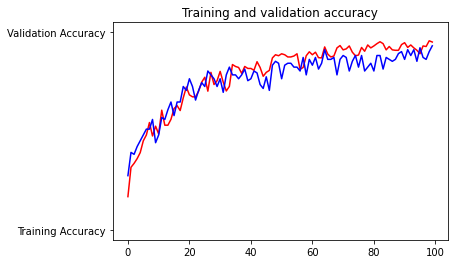

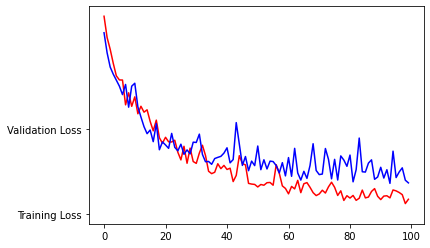

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

# Training with Transfer Learning of inception_v3

In [ ]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-06-09 13:22:37--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  27.6MB/s    in 3.0s    

2022-06-09 13:22:41 (27.6 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
# GRADED FUNCTION: create_pre_trained_model
def create_pre_trained_model(local_weights_file):
  ### START CODE HERE
  pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                  include_top = False, 
                                  weights = None) 

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  ### END CODE HERE

  return pre_trained_model
  

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [ ]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
# GRADED FUNCTION: output_of_last_layer
def output_of_last_layer(pre_trained_model):
  ### START CODE HERE
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)
  ### END CODE HERE

  return last_output


In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 7, 7, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [ ]:
# GRADED FUNCTION: create_final_model
def create_final_model(pre_trained_model, last_output):
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)

  ### START CODE HERE

  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)
  # Add a final sigmoid layer for classification
  x = layers.Dense(10, activation='softmax')(x)

  # Create the complete model by using the Model class
  model = Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = 'adam', 
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

  ### END CODE HERE
  
  return model


In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 47,521,706 total parameters in this model.
There are 38,546,442 trainable parameters in this model.


In [ ]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99.9% accuracy
# (It should take a few epochs)
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 25,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/25
13/13 - 25s - loss: 0.6175 - accuracy: 0.7843 - val_loss: 0.3392 - val_accuracy: 0.9216 - 25s/epoch - 2s/step
Epoch 2/25
13/13 - 25s - loss: 0.5883 - accuracy: 0.8046 - val_loss: 0.3022 - val_accuracy: 0.9118 - 25s/epoch - 2s/step
Epoch 3/25
13/13 - 25s - loss: 0.4990 - accuracy: 0.8350 - val_loss: 0.2181 - val_accuracy: 0.9216 - 25s/epoch - 2s/step
Epoch 4/25
13/13 - 25s - loss: 0.3556 - accuracy: 0.8680 - val_loss: 0.1846 - val_accuracy: 0.9314 - 25s/epoch - 2s/step
Epoch 5/25
13/13 - 26s - loss: 0.4186 - accuracy: 0.8452 - val_loss: 0.2765 - val_accuracy: 0.9020 - 26s/epoch - 2s/step
Epoch 6/25
13/13 - 26s - loss: 0.4325 - accuracy: 0.8553 - val_loss: 0.2315 - val_accuracy: 0.8922 - 26s/epoch - 2s/step
Epoch 7/25
13/13 - 25s - loss: 0.3596 - accuracy: 0.8731 - val_loss: 0.1481 - val_accuracy: 0.9706 - 25s/epoch - 2s/step
Epoch 8/25
13/13 - 25s - loss: 0.2910 - accuracy: 0.8883 - val_loss: 0.1620 - val_accuracy: 0.9608 - 25s/epoch - 2s/step
Epoch 9/25
13/13 - 25s - loss: 0

# Training with Transfer Learning of Mobilenet_V2 --> Used Model for Deploy in Android

---



In [ ]:
import numpy as np
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from tqdm import tqdm

In [ ]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [ ]:
do_fine_tuning = False #@param {type:"boolean"}

In [ ]:
feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=(224,224) + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning)

In [ ]:
print("Building model with", MODULE_HANDLE)

model = tf.keras.Sequential([
        feature_extractor,
        tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Building model with https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_5 (Dense)             (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# GRADED FUNCTION: train_val_generators
def train_val_generator(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale= 1/255.,
                                     rotation_range= 40,
                                     width_shift_range= 0.2,
                                     height_shift_range= 0.2,
                                     shear_range= 0.2,
                                     zoom_range= 0.2,
                                     horizontal_flip= True,
                                     fill_mode= 'nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory= TRAINING_DIR,
                                                      batch_size= 16,
                                                      class_mode= 'categorical',
                                                      target_size=(224, 224))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale= 1/255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory= VALIDATION_DIR,
                                                                batch_size= 16,
                                                                class_mode= 'categorical',
                                                                target_size=(224, 224))
  ### END CODE HERE
  return train_generator, validation_generator


In [ ]:
# Test your generators
train_generator, validation_generator = train_val_generator(TRAINING_DIR, TESTING_DIR)

Found 394 images belonging to 10 classes.
Found 102 images belonging to 10 classes.


In [ ]:
#Unfreeze some layers
NUM_LAYERS = 10 
      
if do_fine_tuning:
    feature_extractor.trainable = True
    
    for layer in model.layers[-NUM_LAYERS:]:
        layer.trainable = True

else:
    feature_extractor.trainable = False

In [ ]:
if do_fine_tuning:
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.002, momentum=0.9),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
else:
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
EPOCHS = 20

hist = model.fit(train_generator,
                 epochs=EPOCHS,
                 validation_data=validation_generator)

Epoch 1/20
25/25 [==============================] - 24s 919ms/step - loss: 0.3138 - accuracy: 0.9264 - val_loss: 0.4844 - val_accuracy: 0.8725
Epoch 2/20
25/25 [==============================] - 20s 803ms/step - loss: 0.2722 - accuracy: 0.9365 - val_loss: 0.4789 - val_accuracy: 0.8431
Epoch 3/20
25/25 [==============================] - 20s 803ms/step - loss: 0.2293 - accuracy: 0.9619 - val_loss: 0.4228 - val_accuracy: 0.8922
Epoch 4/20
25/25 [==============================] - 20s 795ms/step - loss: 0.1943 - accuracy: 0.9645 - val_loss: 0.4191 - val_accuracy: 0.8725
Epoch 5/20
25/25 [==============================] - 20s 796ms/step - loss: 0.2014 - accuracy: 0.9594 - val_loss: 0.3771 - val_accuracy: 0.9020
Epoch 6/20
25/25 [==============================] - 20s 792ms/step - loss: 0.1817 - accuracy: 0.9594 - val_loss: 0.3809 - val_accuracy: 0.8922
Epoch 7/20
25/25 [==============================] - 20s 799ms/step - loss: 0.1763 - accuracy: 0.9670 - val_loss: 0.3646 - val_accuracy: 0.9118

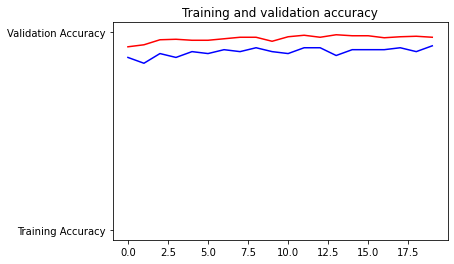

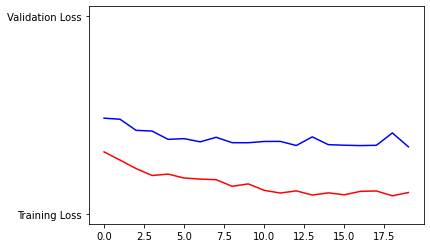

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()


# Test Used Model --> Transfer Learning of Mobilenet_V2

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(224, 224))
  
  x=image.img_to_array(img)
  x /= 255.
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])

  class_names = ['Asagi', 'Bekko', 'Goshiki', 'Hikarimono', 'Kohaku', 'Koromo', 'Sanke', 'Showa', 'Shusui', 'Utsurimono']
  
  max = 0
  index = 0
  num = 0
  loop = 0

  for num in classes[0]:
    loop += 1
    if num >= max:
      max = num
      index = loop
    
  print(class_names[index-1])


Saving a_000001.png to a_000001 (1).png
[1.12115595e-04 1.75541019e-04 2.59921048e-03 2.58488534e-03
 9.89714026e-01 2.70426361e-04 3.52120353e-03 4.87913319e-04
 3.92793532e-04 1.42082892e-04]
Kohaku


# Export Model to TFLite and Optimizations


In [ ]:
KOI_SAVED_MODEL = "exp_saved_model_2"

In [ ]:
tf.saved_model.save(model, KOI_SAVED_MODEL)

INFO:tensorflow:Assets written to: exp_saved_model_2/assets


INFO:tensorflow:Assets written to: exp_saved_model_2/assets


In [ ]:
%%bash -s $KOI_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['keras_layer_1_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 224, 224, 3)
      name: serving_default_keras_layer_1_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_5'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 10)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [ ]:
loaded = tf.saved_model.load(KOI_SAVED_MODEL)

In [ ]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'keras_layer_1_input': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_layer_1_input')})
{'dense_5': TensorSpec(shape=(None, 10), dtype=tf.float32, name='dense_5')}


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(KOI_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
                                       tf.lite.OpsSet.SELECT_TF_OPS]

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [ ]:
tflite_model = converter.convert()
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

## Test the TFLite Model Using the Python Interpreter

In [ ]:
import tensorflow as tf
from tqdm import tqdm
import numpy as np


In [ ]:
# Load TFLite model and allocate tensors.
  
interpreter = tf.lite.Interpreter(model_path="/content/model_small_with_metadata.tflite")
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
# Gather results for the randomly sampled test images
predictions = []

test_labels, test_imgs = [], []
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(224, 224))
  
  x=image.img_to_array(img)
  x /= 255.
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])    
  interpreter.set_tensor(input_index, images)
  interpreter.invoke()
  arrayofpredict = interpreter.get_tensor(output_index)
  class_names = ['Asagi', 'Bekko', 'Goshiki', 'Hikarimono', 'Kohaku', 'Koromo', 'Sanke', 'Showa', 'Shusui', 'Utsurimono']
  
  #print(type())
  max = 0
  index = 0
  num = 0
  loop = 0

  for num in arrayofpredict[0]:
    loop += 1
    if num >= max:
      max = num
      index = loop
    
  print(arrayofpredict[0])
  print(f"Ini adalah ikan koi {class_names[index-1]} --> akurasi {max}")
  #print(label.numpy()[0])
  #print(images)

Saving t0806t014.jpg to t0806t014.jpg
[6.7304100e-06 3.3424437e-04 2.7955605e-03 4.8233673e-05 2.5747868e-05
 7.5501192e-04 4.5772811e-04 7.8035243e-02 7.9879450e-05 9.1746169e-01]
Ini adalah ikan koi Utsurimono --> akurasi 0.9174616932868958
